In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# load data
df = pd.read_csv('/content/drive/MyDrive/Materi Day 25/flight.csv')
df.head(3)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [ ]:
df['WORK_COUNTRY'].unique()

array(['CN', 'US', 'FR', 'AN', 'JP', 'HK', 'MY', 'AU', 'NL', 'MX', 'CA',
       'KR', 'PK', 'TH', 'SG', 'BR', 'PE', 'AE', 'HN', 'PH', 'ID', 'MO',
       'GN', 'FL', 'KH', nan, 'TW', 'VN', 'DE', 'IL', 'CH', 'PA', 'VT',
       'EC', 'NG', 'BI', 'GT', 'BE', 'GL', 'NZ', 'FA', 'NI', 'KO', 'CC',
       'UV', 'MN', 'UK', 'AS', 'IT', 'OM', 'SE', 'BZ', 'IN', 'KZ', 'PT',
       'NO', 'MS', 'FI', 'UZ', 'NE', 'AT', 'AA', 'HU', 'CY', 'EG', 'MA',
       '中', 'ES', 'MZ', 'IR', 'SW', 'RE', 'PS', 'KE', 'SN', 'BB', 'AZ',
       'UA', 'LB', 'YE', 'GE', 'SI', 'KA', 'MV', 'RO', 'ZA', 'DK', 'AB',
       'CD', 'UY', 'CM', 'TK', 'AR', 'BN', 'PN', 'BD', '北', 'SU', 'RU',
       '沈', 'GU', 'GB', 'ZW', 'PP', '芬', 'FO', 'IE', 'PR', 'BS', 'GH',
       'SK', 'IA', 'cn', 'TR', 'LA', 'BG', 'CL', 'CR', 'SA'], dtype=object)

Terdapat 3 feature yang menurut saya mirip, yaitu WORK_CITY, WORK_PROVINCE, WORK_COUNTRY. Kebetulan ketiga kolom ini sama-sama memiliki missing value, namun menurut saya yang masih bisa dikondisikan adalah kolom work country sehingga saya hanya menggunakan 1 kolom untuk dimasukkan ke analisis dan modeling yakni work country, sedangkan lainnya di drop.

In [ ]:
df.drop(['WORK_CITY', 'WORK_PROVINCE'], axis = 'columns', inplace = True)
df.columns

Index(['MEMBER_NO', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'FFP_TIER',
       'WORK_COUNTRY', 'AGE', 'LOAD_TIME', 'FLIGHT_COUNT', 'BP_SUM',
       'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_FLIGHT_DATE', 'LAST_TO_END',
       'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount',
       'Points_Sum', 'Point_NotFlight'],
      dtype='object')

In [ ]:
# drop missing value
df = df.dropna()
df.head(3)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,CN,31.0,3/31/2014,210,505308,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,CN,42.0,3/31/2014,140,362480,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,CN,40.0,3/31/2014,135,351159,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26


In [ ]:
# cek duplikat data
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61856 entries, 0 to 62986
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          61856 non-null  int64  
 1   FFP_DATE           61856 non-null  object 
 2   FIRST_FLIGHT_DATE  61856 non-null  object 
 3   GENDER             61856 non-null  object 
 4   FFP_TIER           61856 non-null  int64  
 5   WORK_COUNTRY       61856 non-null  object 
 6   AGE                61856 non-null  float64
 7   LOAD_TIME          61856 non-null  object 
 8   FLIGHT_COUNT       61856 non-null  int64  
 9   BP_SUM             61856 non-null  int64  
 10  SUM_YR_1           61856 non-null  float64
 11  SUM_YR_2           61856 non-null  float64
 12  SEG_KM_SUM         61856 non-null  int64  
 13  LAST_FLIGHT_DATE   61856 non-null  object 
 14  LAST_TO_END        61856 non-null  int64  
 15  AVG_INTERVAL       61856 non-null  float64
 16  MAX_INTERVAL       618

In [ ]:
df['SUM_YR_1']

0        239560.0
1        171483.0
2        163618.0
3        116350.0
4        124560.0
           ...   
62982         0.0
62983         0.0
62984         0.0
62985         0.0
62986         0.0
Name: SUM_YR_1, Length: 61856, dtype: float64

In [ ]:
# Encoding

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df['GENDER'])
df['GENDERS'] = le.transform(df['GENDER'])
df.head(3)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,...,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,GENDERS
0,54993,11/2/2006,12/24/2008,Male,6,CN,31.0,3/31/2014,210,505308,...,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50,1
1,28065,2/19/2007,8/3/2007,Male,6,CN,42.0,3/31/2014,140,362480,...,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33,1
2,55106,2/1/2007,8/30/2007,Male,6,CN,40.0,3/31/2014,135,351159,...,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26,1


In [ ]:
df.drop(['GENDER'], axis = 'columns', inplace = True)
df.columns

Index(['MEMBER_NO', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'FFP_TIER',
       'WORK_COUNTRY', 'AGE', 'LOAD_TIME', 'FLIGHT_COUNT', 'BP_SUM',
       'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_FLIGHT_DATE', 'LAST_TO_END',
       'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount',
       'Points_Sum', 'Point_NotFlight', 'GENDERS'],
      dtype='object')

In [ ]:
freq_wc = df['WORK_COUNTRY'].value_counts().reset_index()
freq_wc.rename(columns={'index': 'WORK_COUNTRY', 'WORK_COUNTRY': 'FREQ_WORK_COUNTRY'}, inplace = True)
freq_wc['PCT_WORK_COUNTRY'] = round((freq_wc['FREQ_WORK_COUNTRY']/freq_wc['FREQ_WORK_COUNTRY'].sum())*100,2)
freq_wc

,WORK_COUNTRY,FREQ_WORK_COUNTRY,PCT_WORK_COUNTRY
0,CN,56733,91.72
1,HK,974,1.57
2,JP,865,1.40
3,KR,781,1.26
4,US,561,0.91
...,...,...,...
112,AB,1,0.00
113,CD,1,0.00
114,PA,1,0.00
115,MS,1,0.00


In [ ]:
df = df.merge(freq_wc[['WORK_COUNTRY','PCT_WORK_COUNTRY']], on='WORK_COUNTRY', how='inner')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,...,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,GENDERS,PCT_WORK_COUNTRY
0,54993,11/2/2006,12/24/2008,6,CN,31.0,3/31/2014,210,505308,239560.0,...,3/31/2014,1,3.483254,18,34,0.961639,619760,50,1,91.72
1,28065,2/19/2007,8/3/2007,6,CN,42.0,3/31/2014,140,362480,171483.0,...,3/25/2014,7,5.194245,17,29,1.252314,415768,33,1,91.72
2,55106,2/1/2007,8/30/2007,6,CN,40.0,3/31/2014,135,351159,163618.0,...,3/21/2014,11,5.298507,18,20,1.254676,406361,26,1,91.72
3,39546,4/10/2009,4/15/2009,6,CN,48.0,3/31/2014,152,273844,124560.0,...,3/27/2014,5,4.788079,47,27,0.970658,338813,39,1,91.72
4,56972,2/10/2008,9/29/2009,6,CN,64.0,3/31/2014,92,313338,112364.0,...,1/13/2014,79,7.043956,52,10,0.967692,343121,15,1,91.72


In [ ]:
df['LOAD_TIME'].unique()

array(['3/31/2014'], dtype=object)

In [ ]:
# kita pisahkan kolom numeric selain tanggal dan id
nums = ['FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight', 'GENDERS', 'PCT_WORK_COUNTRY']
date = ['MEMBER_NO', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME' 'LAST_FLIGHT_DATE']

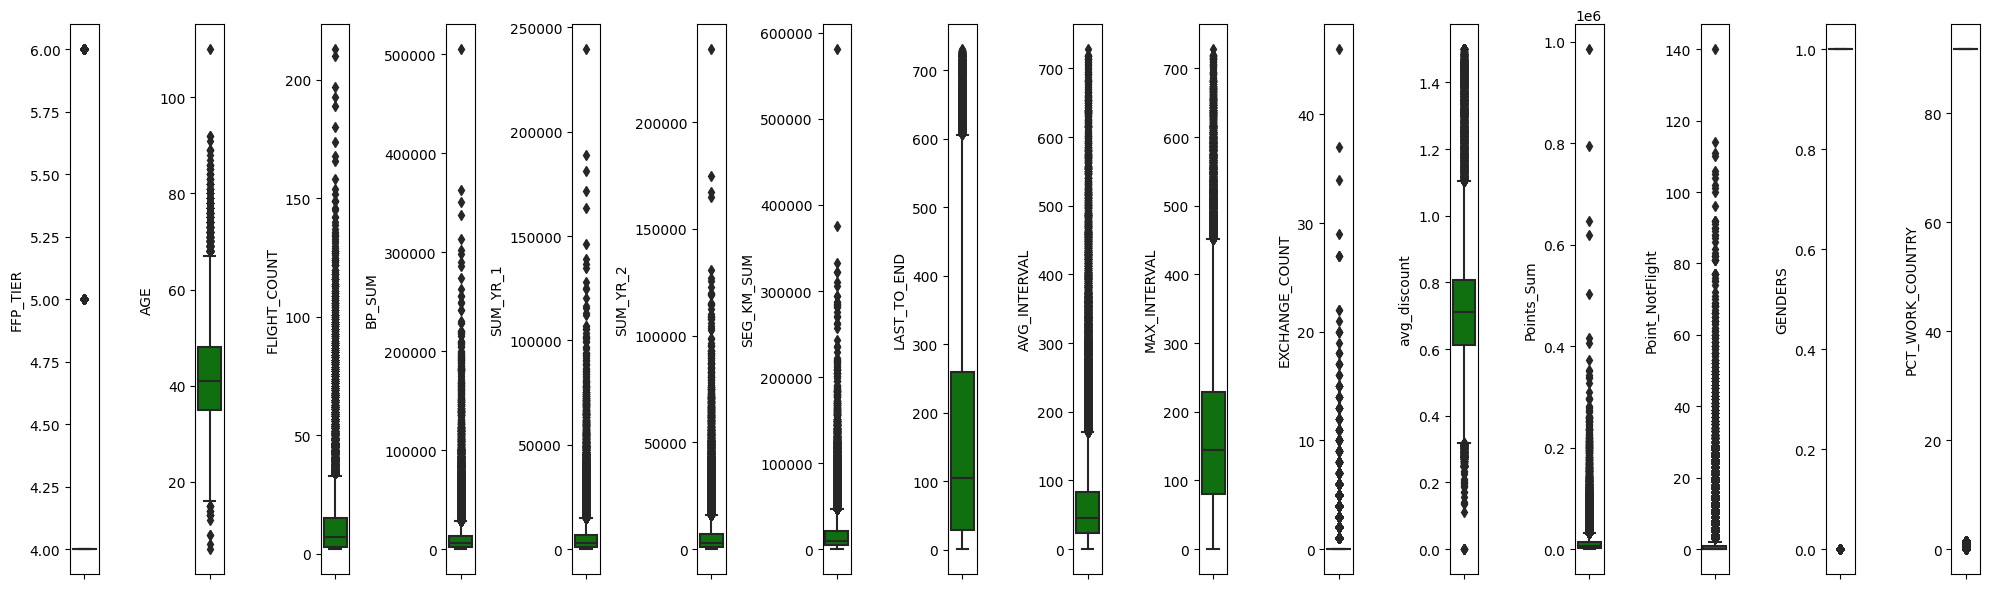

In [ ]:
# step selanjutnya mau melihat outliers dengan menggunakan Boxplot untuk kolom nums

features = nums
plt.figure(figsize = (20,6))
for i in range (0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y = df[features[i]], color = 'green')
  plt.tight_layout()

Nampaknya setiap feature memiliki outlier. Untuk saat ini kita biarkan dulu

In [ ]:
df.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,GENDERS,PCT_WORK_COUNTRY
count,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000
mean,31489.315943,4.103450,42.491108,11.964401,11041.484739,5374.941563,5662.081399,17303.810027,172.606942,68.154935,167.461556,0.324188,0.721649,12681.680953,2.759425,0.764647,84.199939
std,18192.014120,0.375833,9.887556,14.116064,16394.475910,8123.952605,8702.731851,21040.271177,181.234370,77.684101,123.155015,1.143987,0.184792,20597.492952,7.406240,0.424223,25.025901
min,2.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15714.750000,4.000000,35.000000,3.000000,2591.000000,1020.000000,833.000000,4866.750000,29.000000,23.750000,81.000000,0.000000,0.612650,2847.750000,0.000000,1.000000,91.720000
50%,31486.500000,4.000000,41.000000,7.000000,5800.500000,2816.000000,2826.500000,10183.000000,105.000000,45.000000,144.000000,0.000000,0.711827,6442.000000,0.000000,1.000000,91.720000
75%,47259.250000,4.000000,48.000000,15.000000,12975.250000,6600.000000,6912.000000,21497.500000,260.000000,82.500000,229.000000,0.000000,0.808825,14457.250000,1.000000,1.000000,91.720000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.000000,140.000000,1.000000,91.720000


Asumsi : beberapa kolom terlihat masih masuk akal datanya. Tapi di bagian kolom LAST_TO_END kita bisa melihat rata-rata penerbangan terakhir penumpang adalah sekitar 172 hari yang lalu, median = 105 hari, dan max = 728 hari ---> sangat jauh. Terlihat juga pada median di kolom FLIGHT_COUNT = 7, yang artinya sebenarnya para penumpang tidak begitu sering menggunakan armada pesawat ini.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
new_df = df.copy()

In [ ]:
new_df.drop(['MEMBER_NO', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE'], axis = 'columns', inplace = True)
new_df.columns

Index(['FFP_TIER', 'WORK_COUNTRY', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1',
       'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
       'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight',
       'GENDERS', 'PCT_WORK_COUNTRY'],
      dtype='object')

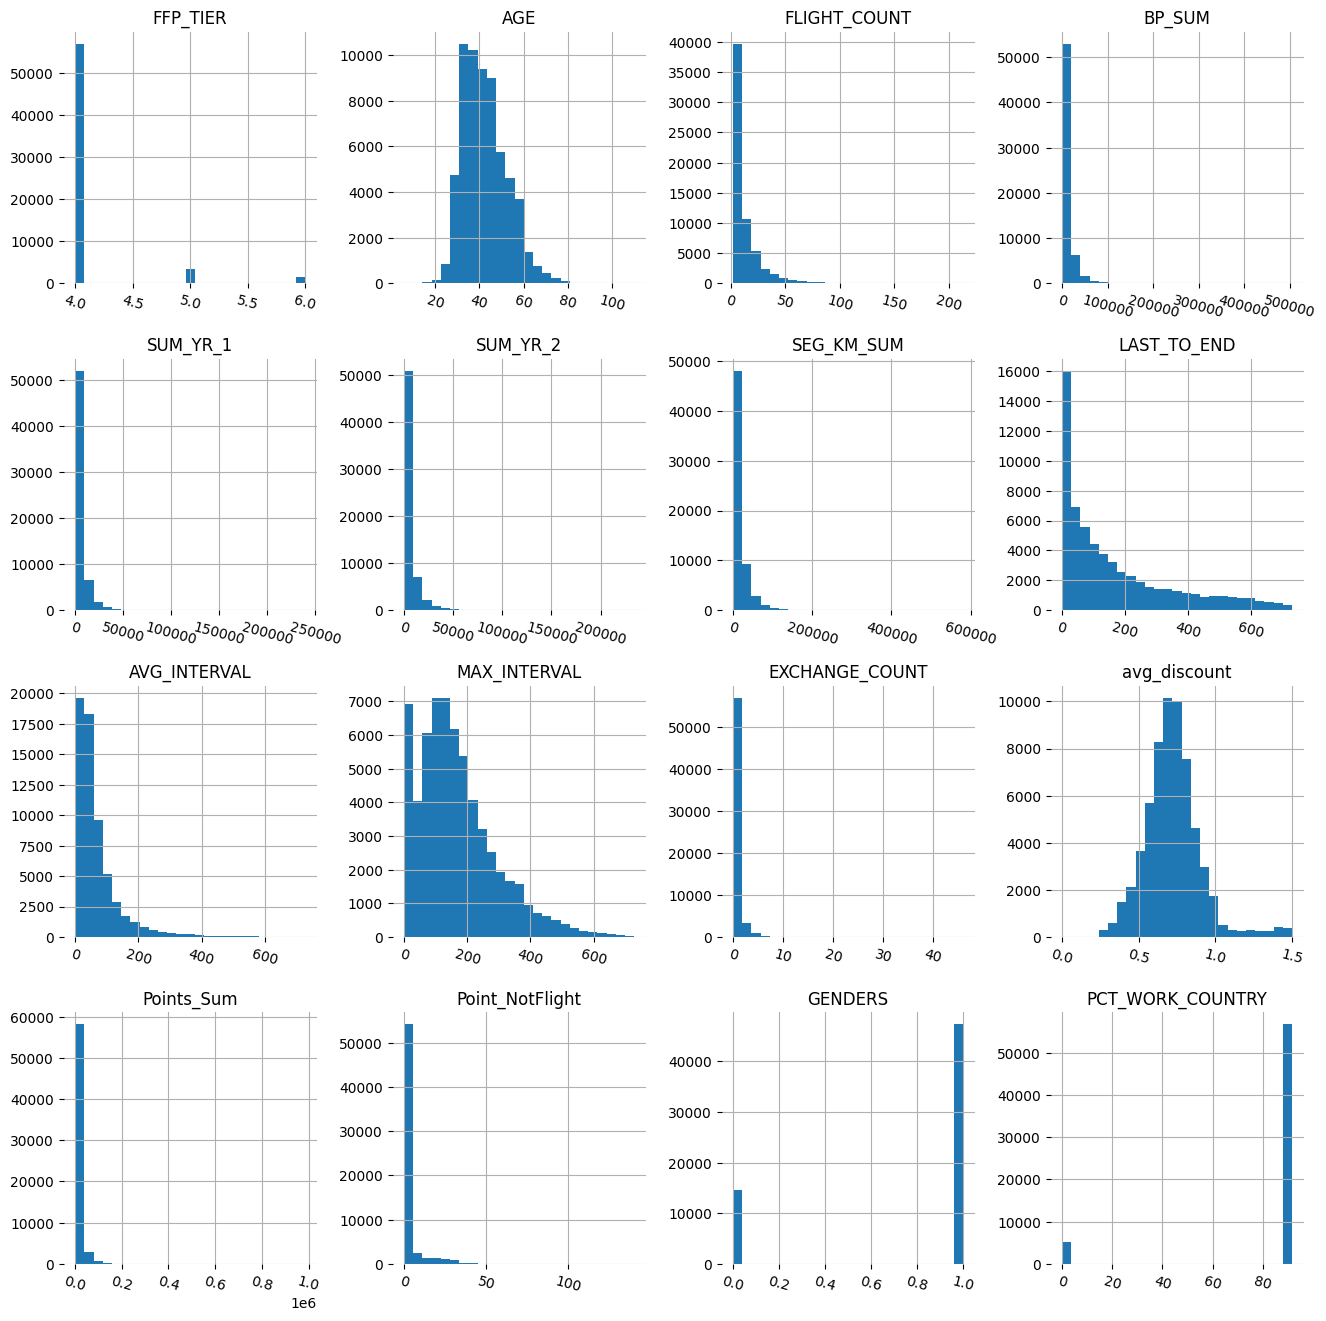

In [ ]:
# melihat distribusi numerik

h = new_df.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

Dapat dilihat bahwa hampir semua kolom skewed

In [ ]:
# ubah data type tanggal

df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'], errors = 'coerce')
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'], errors = 'coerce')
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'], errors = 'coerce')
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'], errors = 'coerce')

In [ ]:
# membuat baseline model RFM
# grouping

from pandasql import sqldf

def dataset():
  q = '''
        select
        MEMBER_NO,
        LAST_TO_END as RECENCY,
        FLIGHT_COUNT as FREQUENCY,
        SUM_YR_1 as MONETARY

        from df
        group by 1
        order by FREQUENCY desc
    '''
  return q

dataset = sqldf(dataset())
dataset.head()

,MEMBER_NO,RECENCY,FREQUENCY,MONETARY
0,45075,3,213,136769.0
1,54993,1,210,239560.0
2,49737,1,197,113295.0
3,20121,1,193,93532.0
4,12326,1,189,74201.0


In [ ]:
# feature selection
feat = ['RECENCY', 'FREQUENCY', 'MONETARY']
data_rfm = dataset[feat].copy()
data_rfm.head(3)

,RECENCY,FREQUENCY,MONETARY
0,3,213,136769.0
1,1,210,239560.0
2,1,197,113295.0


In [ ]:
data_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61856 entries, 0 to 61855
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RECENCY    61856 non-null  int64  
 1   FREQUENCY  61856 non-null  int64  
 2   MONETARY   61856 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [ ]:
data_rfm = data_rfm.dropna()

In [ ]:
data_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61856 entries, 0 to 61855
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RECENCY    61856 non-null  int64  
 1   FREQUENCY  61856 non-null  int64  
 2   MONETARY   61856 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [ ]:
# scaling
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(data_rfm)

In [ ]:
df2 = pd.DataFrame(data = x_std, columns = feat)
df2.head()

,RECENCY,FREQUENCY,MONETARY
0,-0.935851,14.241733,16.173792
1,-0.946886,14.029208,28.826725
2,-0.946886,13.108264,13.284289
3,-0.946886,12.824896,10.851586
4,-0.946886,12.541529,8.472060


<Axes: >

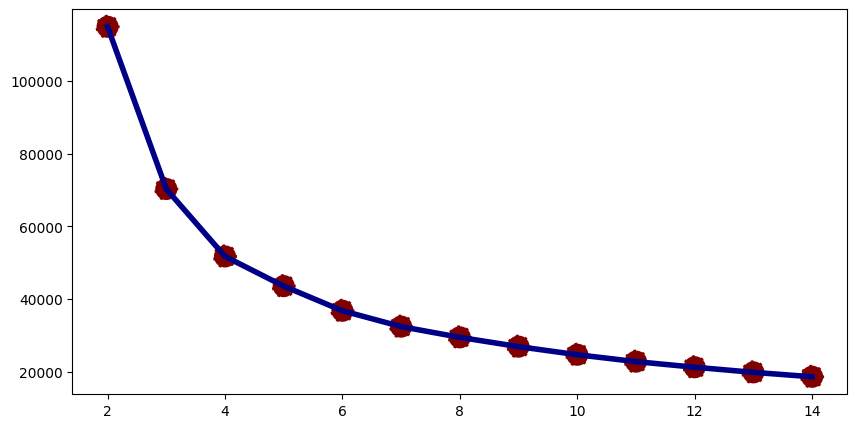

In [ ]:
# mencari nilai K terbaik menggunakan elbow method

from sklearn.cluster import KMeans
inertia = []

for i in range(2, 15):
  kmeans = KMeans(n_clusters = i, random_state = 0)
  kmeans.fit(x_std)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))

sns.lineplot(x = range(2, 15), y = inertia, color = '#000087', linewidth = 4)
sns.scatterplot(x = range(2, 15), y = inertia, s = 300, color = '#800000', linestyle = '--')

terlihat bahwa terdapat patahan di x = 4, maka kita asumsikan untuk dataset ini dengan menggunakan baseline model RFM akan digunakan 4 cluster

In [ ]:
# clustering dengan n_cluster = 4
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(x_std)

KMeans(n_clusters=4, random_state=0)

In [ ]:
# beri label
data_rfm['clusters'] = kmeans.labels_
data_rfm.head()

,RECENCY,FREQUENCY,MONETARY,clusters
0,3,213,136769.0,3
1,1,210,239560.0,3
2,1,197,113295.0,3
3,1,193,93532.0,3
4,1,189,74201.0,3


In [ ]:
# kita lihat percentilnya
perc = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
data_rfm.describe(percentiles=perc)

,RECENCY,FREQUENCY,MONETARY,clusters
count,61856.000000,61856.000000,61856.000000,61856.000000
mean,172.606942,11.964401,5374.941563,1.461022
std,181.234370,14.116064,8123.952605,0.805667
min,1.000000,2.000000,0.000000,0.000000
10%,8.000000,2.000000,0.000000,0.000000
20%,20.000000,3.000000,688.000000,1.000000
30%,38.000000,4.000000,1315.000000,1.000000
40%,69.000000,5.000000,2000.000000,2.000000
50%,105.000000,7.000000,2816.000000,2.000000
60%,151.000000,9.000000,3924.000000,2.000000


Recency menunjukkan nilai min = 1 hari dengan median = 105 hari
Frequency menunjukkan pengguna maskapai ini minimal menggunakan armada ini sebanyak 2 kali, dengan mediannya = 7 kali. Namun pada kolom monetary, bisa dilihat bahwa nilai min = 0, artinya pada suatu kesempatan pengguna tidak membayar harga tiket sama sekali. Hal ini bisa saja terjadi ketika penumpang menggunakan diskon dan poinnya untuk ditukarkan untuk membeli tiket pesawat

In [ ]:
# visualisasi
pca = PCA(n_components=2)

pca.fit(x_std)
pcs = pca.transform(x_std)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = data_rfm['clusters']
data_pca.head()

,PC 1,PC 2,clusters
0,19.925230,8.259604,3
1,27.604072,13.903089,3
2,17.384701,6.807283,3
3,15.691820,5.678797,3
4,14.031790,4.574185,3


<Axes: xlabel='PC 1', ylabel='PC 2'>

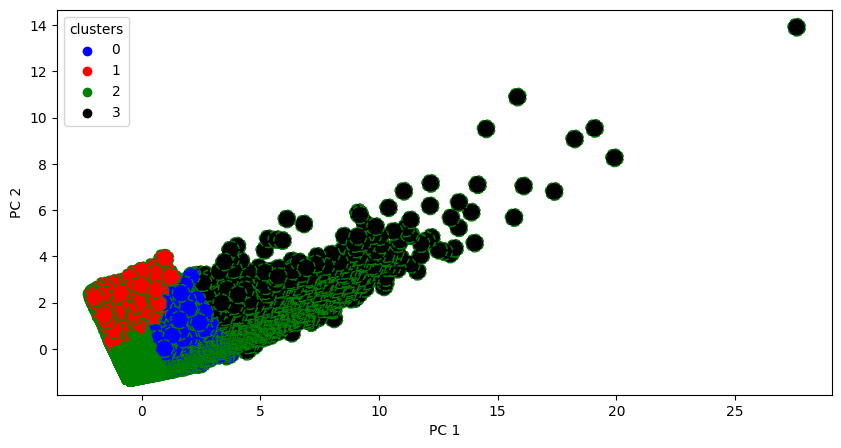

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='green',
    linestyle='--',
    data=data_pca,
    palette=['blue','red','green','black'],
    s=160,
    ax=ax
)

In [ ]:
# groupby
data_rfm.groupby('clusters').agg({'RECENCY':['mean'], 'FREQUENCY':['mean'], 'MONETARY':['mean', 'median']})

RECENCY  FREQUENCY      MONETARY         
                mean       mean          mean   median
clusters                                              
0          51.497295  27.634267  12303.137921  11368.0
1         461.351883   4.034410   3304.816503   2400.5
2         100.874653   7.724860   2491.816649   1785.0
3          28.574124  64.123450  36720.115903  31925.0

Kita analisis berdasarkan cluster:

Cluster 0 --> bisa dibilang ini adalah potential customer. Customer di cluster ini cukup sering menggunakan pesawat terbang untuk berpergian.

Cluster 1 --> menurut saya di cluster ini termasuk lost customer. Terbukti bahwa recency di cluster 1 sangat tinggi, yakni 461 hari yang membuktikan bahwa dalam waktu 1 tahun, tidak ada pembelian tiket pesawat di cluster ini

Cluster 2 --> cluster ini termasuk hibernating. Di cluster ini cukup jarang berpergian menggunakan pesawat terbang, namun bila dilihat rata-ratanya adalah sekitar 7 kali

Cluster 3 --> Cluster ini merupakan cluster champion dan tentu saja perusahaan tidak boleh kehilangan customer di cluster ini. Terbukti customer di cluster ini cukup sering berpergian menggunakan pesawat dan rata-rata penggunaannya adalah sebanyak 64 kali